In [330]:
from urllib.request import urlopen
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import aiohttp
from time import sleep

In [3]:
api_key = "MmFiODExNjgtYzA4Ny00MmIyLTk0N2UtOTk2ZjllM2E0NDVh"

In [245]:
def report(per_page = 1000):
    return "https://suppliers-stats.wildberries.ru/api/v1/supplier/reportDetailByPeriod?key=%s&dateFrom=%s&dateto=%s&limit=%s" % (api_key, "%s", "%s", per_page)

### report data

| Column name      | Description |
| ----------- | ----------- |
|realizationreport_id | Номер отчета|
|suppliercontract_code | Договор|
|rr_dt | Дата операции|
|rrd_id | Номер строки|
|gi_id | номер поставки|
|subject_name | Предмет|
|NM_id | Артикул|
|brand_name | Бренд|
|sa_name | Артикул поставщика|
|ts_name | Размер|
|barcode | Баркод|
|doc_type_name | Тип документа|
|quantity | Количество|
|nds | Ставка НДС|
|cost_amount | Себестоимость Сумма|
|retail_price | Цена розничная|
|retail_amount | Сумма продаж(Возвратов)|
|retail_commission | Сумма комиссии продаж|
|sale_percent | Согласованная скидка|
|commission_percent | Процент комиссии|
|customer_reward | Вознаграждение покупателю|
|supplier_reward | Вознаграждение поставщику|
|office_name | Склад|
|supplier_oper_name | Обоснование для оплаты|
|order_dt | Даты заказа|
|sale_dt | Дата продажи|
|shk_id | ШК|
|retail_price_withdisc_rub | Цена розничная с учетом согласованной скидки|
|for_pay | К перечислению поставщику|
|for_pay_nds | К перечислению поставщику НДС|
|delivery_amount | Кол-во доставок|
|return_amount | Кол-во возвратов|
|delivery_rub | Стоимость логистики|
|gi_box_type_name | Тип коробов|
|product_discount_for_report | Согласованный продуктовый дисконт|
|supplier_promo | Промокод|
|supplier_spp | Скидка постоянного покупателя|

In [246]:
def sales(per_page = 1000):
    return "https://suppliers-stats.wildberries.ru/api/v1/supplier/sales?key=%s&dateFrom=%s&dateto=%s&limit=%s" % (api_key, "%s", "%s", per_page)


In [276]:
def orders(per_page = 1000):
    return "https://suppliers-stats.wildberries.ru/api/v1/supplier/orders?key=%s&dateFrom=%s&dateto=%s&limit=%s" % (api_key, "%s", "%s", per_page)


### report data

| Column name      | Description |
| ----------- | ----------- |
| number| номер заказа | 
| date| дата заказа | 
| lastChangeDate| дата время обновления информации в сервисе | 
| supplierArticle| ваш артикул | 
| techSize| размер | 
| barcode| штрих-код | 
| quantity| кол-во | 
| totalPrice| цена до согласованной скидки/промо/спп | 
| discountPercent| согласованный итоговый дисконт. | 
| warehouseName| склад отгрузки | 
| oblast| область | 
| incomeID| номер поставки | 
| odid| уникальный идентификатор позиции заказа | 
| nmid| Код WB | 
| subject| предмет | 
| category| категория | 
| brand| бренд | 
| is_cancel| признак отмены заказа (0 – отмены не было, 1 – отмена была | 
| cancel_dt| дата отмены заказа |

In [294]:
[2] + [1]

[2, 1]

In [327]:
async def load_data(metod, date, datemax, max_rrdid = 100):
    rrdid = 0
    data = []
    date = pd.to_datetime(date)
    datemax = pd.to_datetime(datemax)
    while date <= datemax and rrdid < max_rrdid:
        dd = date.strftime("%Y-%m-%d")
        url = metod % (dd, dd)
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as resp:
                new_data = await resp.json()
                
                print(dd, len(data), resp)
                if new_data:
                    data += new_data
                    print(dd, len(new_data))
        date += pd.DateOffset(1)
        rrdid += 1
    return data

In [338]:
def load_data(metod, date, datemax, max_rrdid = 100):
    rrdid = 0
    data = np.array([])
    date = pd.to_datetime(date)
    datemax = pd.to_datetime(datemax)
    while date <= datemax and rrdid < max_rrdid:
        dd = date.strftime("%Y-%m-%d")
        url = metod % (dd, dd)
        with urlopen(url) as ans:
            new_data = json.load(ans)
            data = np.concatenate([data, new_data])
            print(dd, len(new_data), data.shape[0])
            sleep(10)
        date += pd.DateOffset(1)
        rrdid += 1
    return data

In [339]:
data = load_data(sales(), "2021-10-02", "2021-10-10")

HTTPError: HTTP Error 429: Too Many Requests

[{'number': '14417548287',
  'date': '2021-10-02T00:00:00',
  'lastChangeDate': '2021-10-02T00:25:34',
  'supplierArticle': 'SP73705DARKGREY',
  'techSize': '11',
  'barcode': '4610109584293',
  'quantity': -1,
  'totalPrice': -5100,
  'discountPercent': 0,
  'isSupply': False,
  'isRealization': True,
  'orderId': None,
  'promoCodeDiscount': 0,
  'warehouseName': 'Подольск',
  'countryName': 'Россия',
  'oblastOkrugName': 'Центральный федеральный округ',
  'regionName': 'Московская',
  'incomeID': 3084209,
  'saleID': 'D14417548287',
  'odid': 100708449352,
  'spp': 0,
  'forPay': -2904.45,
  'finishedPrice': -3075.3,
  'priceWithDisc': -3417,
  'nmId': 27435699,
  'subject': 'Брюки',
  'category': 'Одежда',
  'brand': 'Premont',
  'IsStorno': 0,
  'gNumber': '2326998914169552306'},
 {'number': '14425272140',
  'date': '2021-10-01T00:00:00',
  'lastChangeDate': '2021-10-02T02:03:45',
  'supplierArticle': 'WP72282BLACK',
  'techSize': '7',
  'barcode': '4630079125692',
  'quantity': -

In [281]:
df = pd.json_normalize(data)
#df.drop(["realizationreport_id", "rrd_id"], inplace = True, axis = 1)

In [283]:
#df[["subject_name", "commission_percent", "supplier_reward", "rr_dt", "order_dt", "sale_dt", "retail_amount", "gi_box_type_name"]].head()


In [286]:
df['date'] = pd.to_datetime(df.date)

In [287]:
df.dtypes

number                       object
date                 datetime64[ns]
lastChangeDate               object
supplierArticle              object
techSize                     object
barcode                      object
quantity                      int64
totalPrice                    int64
discountPercent               int64
isSupply                       bool
isRealization                  bool
orderId                     float64
promoCodeDiscount             int64
warehouseName                object
countryName                  object
oblastOkrugName              object
regionName                   object
incomeID                    float64
saleID                       object
odid                          int64
spp                           int64
forPay                      float64
finishedPrice               float64
priceWithDisc               float64
nmId                          int64
subject                      object
category                     object
brand                       

In [289]:
col = "date"
day = df[col].apply(lambda x: x.date()).to_frame()
day = day[day[col] > pd.to_datetime("2021-09-02")];
day = day.sort_values(by = col)

''

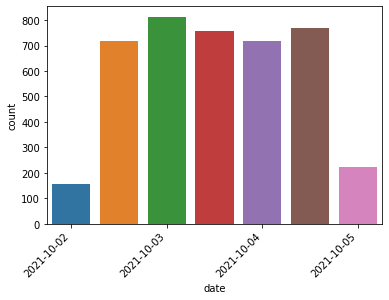

In [290]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plot = sns.countplot(x = col, data = day)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
plt.xticks(rotation = 45, ha = 'right')
;

In [2]:
import sqlite3

In [4]:
import numpy as np

In [42]:
types = ["pants", "coats","pants", "coats","pants", "coats", "boots", "boots", "boots", "scarfs"]

In [51]:
price = {
    "pants": 1000,
    "coats": 2000,
    "boots": 600,
    "scarfs": 300,
}

In [74]:
places = ["ozon", "ozon", "wildberries", "wildberries", "wildberries"]

In [61]:
864 / 1000000

0.000864

In [76]:
con = sqlite3.connect('harumi.db')
cur = con.cursor()
ctime = time.time() - 3600 * 24
for i in range(10000):
    if np.random.random() < 0.0864:
        ctime += np.random.normal(100, 10)
    tt = np.random.choice(types)
    cur.execute(f"""
    INSERT INTO sales (time, type, price, buyer, marketplace)
    VALUES ({ctime}, '{tt}', {np.random.normal(price[tt], price[tt]*0.05)}, 
    '{"test buyer" + str(np.random.randint(10))}', '_{np.random.choice(places)}');""")

In [77]:
con.commit()
con.close()

In [29]:
import time

time.time()

1639636721.523229

In [66]:
np.random.choice(places)

'ozon, wildberries'